# Regresión múltiple

- Tarea: entrenar un modelo que predice el Precio de un vehículo, basado en su kilometraje, número de cilindros y año de fabricación

- Dataset: https://www.kaggle.com/austinreese/craigslist-carstrucks-data/version/10

## Preparación de los datos

Carguemos nuestros dataset de carros usados con precios y otras caracteristicas

In [220]:
import pandas as pd
df = pd.read_csv("car_prices.csv")
df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color
0,7316814884,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,other,NaN,NaN,pickup,white
1,7316814758,22590,2010.0,chevrolet,silverado 1500,good,8 cylinders,gas,71229.0,other,NaN,NaN,pickup,blue
2,7316814989,39590,2020.0,chevrolet,silverado 1500 crew,good,8 cylinders,gas,19160.0,other,NaN,NaN,pickup,red
3,7316743432,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,gas,41124.0,other,NaN,NaN,pickup,red
4,7316356412,15000,2013.0,ford,f-150 xlt,excellent,6 cylinders,gas,128000.0,automatic,rwd,full-size,truck,black


Visualizamos los vehiculos agrupados por rangos de kilometraje.

Para esto vamos a utilizar la función pandas.cut(...).
- pandas.cut(..): Es útil cuando necesite segmentar y ordenar valores de datos en contenedores. Esta función también es útil para convertir una variable continua a una categórica.
- bins = contenedores

In [221]:
df['odometer'].max()

250000.0

In [222]:
import numpy as np
bins = np.arange(0, 250001, 20000)
bins

array([     0,  20000,  40000,  60000,  80000, 100000, 120000, 140000,
       160000, 180000, 200000, 220000, 240000])

In [226]:
grouping = pd.cut(df['odometer'], bins)
groups = df.groupby(grouping)['price'].mean()
groups

odometer
(0, 20000]          31343.108237
(20000, 40000]      28727.941799
(40000, 60000]      23741.551033
(60000, 80000]      19372.390309
(80000, 100000]     15534.047156
(100000, 120000]    13324.035905
(120000, 140000]    11485.799505
(140000, 160000]    10036.434229
(160000, 180000]     9109.990589
(180000, 200000]     8116.431396
(200000, 220000]     8042.389774
(220000, 240000]     7590.906678
Name: price, dtype: float64

Podemos usar pandas para seleccionar solamente las caracteristicas en las que estamos interesados, y el valor que estamos tratando de predecir

<AxesSubplot:xlabel='odometer'>

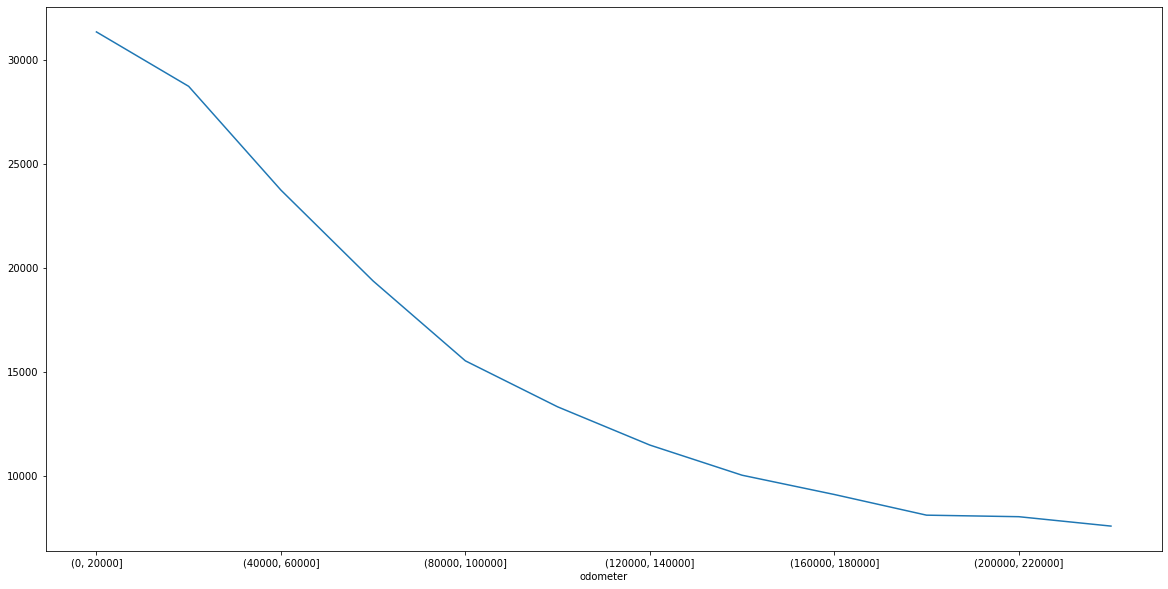

In [228]:
groups.plot.line(figsize=[20, 10])

En este ejemplo estamos evitando datos como la marca (manufacturer) o el modelo (model) ya que las regresiones no funcionan bien con este tipo de datos, al menos que puedas convertirlos a algún valor númerico.

En este caso, usaremos pandas para convertir el valor de número de cilindros (cyllinders) a entero.

In [229]:
df.columns

Index(['id', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size',
       'type', 'paint_color'],
      dtype='object')

In [233]:
maindf = df[['odometer', 'cylinders', 'year', 'price']].copy()
maindf

,odometer,cylinders,year,price
0,57923.0,8 cylinders,2014.0,33590
1,71229.0,8 cylinders,2010.0,22590
2,19160.0,8 cylinders,2020.0,39590
3,41124.0,8 cylinders,2017.0,30990
4,128000.0,6 cylinders,2013.0,15000
...,...,...,...,...
225654,53475.0,6 cylinders,2016.0,29590
225655,55612.0,8 cylinders,2016.0,32990
225656,30814.0,6 cylinders,2018.0,33590
225657,32226.0,6 cylinders,2019.0,23590


In [234]:
maindf['cylinders'].unique()

array(['8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       '3 cylinders', '10 cylinders', '12 cylinders'], dtype=object)

In [235]:
maindf['cylinders'] = maindf.apply(lambda row: int(row['cylinders'].split()[0]), axis=1)
maindf

,odometer,cylinders,year,price
0,57923.0,8,2014.0,33590
1,71229.0,8,2010.0,22590
2,19160.0,8,2020.0,39590
3,41124.0,8,2017.0,30990
4,128000.0,6,2013.0,15000
...,...,...,...,...
225654,53475.0,6,2016.0,29590
225655,55612.0,8,2016.0,32990
225656,30814.0,6,2018.0,33590
225657,32226.0,6,2019.0,23590


## Entrenando mi modelo

Creamos dos conjuntos de datos:

- Panda DataFrame con características, lo llamamos X (por convención se usa X en mayúsculas)
    - ['odometer', 'cylinders', 'year']
- Panda Series con labels (valores a predecir), lo llamamos y (por convención se usa y en minúsculas)

In [236]:
X = maindf[['odometer', 'cylinders', 'year']].copy()
X

,odometer,cylinders,year
0,57923.0,8,2014.0
1,71229.0,8,2010.0
2,19160.0,8,2020.0
3,41124.0,8,2017.0
4,128000.0,6,2013.0
...,...,...,...
225654,53475.0,6,2016.0
225655,55612.0,8,2016.0
225656,30814.0,6,2018.0
225657,32226.0,6,2019.0


In [238]:
y = maindf['price']
y

0         33590
1         22590
2         39590
3         30990
4         15000
          ...  
225654    29590
225655    32990
225656    33590
225657    23590
225658    28990
Name: price, Length: 225659, dtype: int64

Escalemos nuestras características en el mismo rango para que podamos comparar fácilmente los coeficientes con los que terminamos.

- Usamos el objeto StandardScaler del paquete sklearn.preprocessing para escalar mis datos y hacerlos comparables. 

- El objeto StandardScaler ofrece el metodo fit_transform(...) que nos ayuda con esto.

Recuerda que el orden de las caracteristicas es importante durante el entrenamiento, ya que durante la inferencia debemos pasarlas en el mismo orden!

In [239]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X[['odometer', 'cylinders', 'year']] = scaler.fit_transform(X[['odometer', 'cylinders', 'year']].values)
X

,odometer,cylinders,year
0,-0.656294,1.287369,0.381170
1,-0.429595,1.287369,-0.025902
2,-1.316715,1.287369,0.991776
3,-0.942506,1.287369,0.686473
4,0.537635,0.034479,0.279402
...,...,...,...
225654,-0.732077,0.034479,0.584705
225655,-0.695668,1.287369,0.584705
225656,-1.118161,0.034479,0.788241
225657,-1.094104,0.034479,0.890009


Agregamos una columna constante a nuestro modelo de tal manera que podamos tener una intercepción.

Para realizar esto usamos el método add_constant(...) del paquete statsmodels.api

In [240]:
import statsmodels.api as sm
X = sm.add_constant(X)
X

,const,odometer,cylinders,year
0,1.0,-0.656294,1.287369,0.381170
1,1.0,-0.429595,1.287369,-0.025902
2,1.0,-1.316715,1.287369,0.991776
3,1.0,-0.942506,1.287369,0.686473
4,1.0,0.537635,0.034479,0.279402
...,...,...,...,...
225654,1.0,-0.732077,0.034479,0.584705
225655,1.0,-0.695668,1.287369,0.584705
225656,1.0,-1.118161,0.034479,0.788241
225657,1.0,-1.094104,0.034479,0.890009


Entrenamos nuestro modelo de regresión OLS (ordinary least squares).

Para esto usaremos:
- el metodo OLS(y, X).fit() del paquete statsmodels.api para entrenar el modelo
- el metodo .summary() para ver el resumen de mi entrenamiento

In [244]:
len(X)

225659

In [243]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 6.672e+04
Date:                Fri, 08 Oct 2021   Prob (F-statistic):               0.00
Time:                        19:52:14   Log-Likelihood:            -2.4042e+06
No. Observations:              225659   AIC:                         4.808e+06
Df Residuals:                  225655   BIC:                         4.808e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.753e+04     21.576    812.622      0.0

La tabla de coeficientes anterior nos da los valores para insertar en una ecuación de forma:
- B0 + B1 * odometer + B2 * cylinders + B3 * year

## Usando mi modelo para realizar predicciones

Comencemos escalando nuestras características en la misma escala que usamos para entrenar el modelo.

Usamos StandardScaler.transform([[...]]) para escalar mis datos

In [245]:
value = [45000, 6, 2018]
scaled = scaler.transform([value])
scaled

array([[-0.87646857,  0.0344788 ,  0.78824087]])

Agregamos nuevamente la columna constante (intersección) nuevamente.

Para realizar esto utilizamos numpy.insert(...)

In [246]:
scaled = np.insert(scaled, 0, 1)
scaled

array([ 1.        , -0.87646857,  0.0344788 ,  0.78824087])

Llame la función est.predict(...) pasando las características escaladas

In [247]:
predicted = model.predict(scaled)
predicted

array([26433.83820502])